In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/globalstoreeda/Global Superstore.xls


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score

In [3]:
df=pd.read_excel("/kaggle/input/globalstoreeda/Global Superstore.xls","Orders")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
df.shape

(51290, 24)

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [8]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [9]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

Row ID             0.00000
Order ID           0.00000
Order Date         0.00000
Ship Date          0.00000
Ship Mode          0.00000
Customer ID        0.00000
Customer Name      0.00000
Segment            0.00000
City               0.00000
State              0.00000
Country            0.00000
Postal Code       80.51472
Market             0.00000
Region             0.00000
Product ID         0.00000
Category           0.00000
Sub-Category       0.00000
Product Name       0.00000
Sales              0.00000
Quantity           0.00000
Discount           0.00000
Profit             0.00000
Shipping Cost      0.00000
Order Priority     0.00000
dtype: float64

In [11]:
df.drop("Postal Code",axis=1).inplace=True

In [12]:
df_num=df.select_dtypes(include=[np.number])
df_cat=df.select_dtypes(include=["object"])

In [13]:
df_num

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
0,32298,10024.0,2309.650,7,0.0,762.1845,933.570
1,26341,NaN,3709.395,9,0.1,-288.7650,923.630
2,25330,NaN,5175.171,9,0.1,919.9710,915.490
3,13524,NaN,2892.510,5,0.1,-96.5400,910.160
4,47221,NaN,2832.960,8,0.0,311.5200,903.040
...,...,...,...,...,...,...,...
51285,29002,NaN,65.100,5,0.0,4.5000,0.010
51286,35398,77095.0,0.444,1,0.8,-1.1100,0.010
51287,40470,93030.0,22.920,3,0.0,11.2308,0.010
51288,9596,NaN,13.440,2,0.0,2.4000,0.003


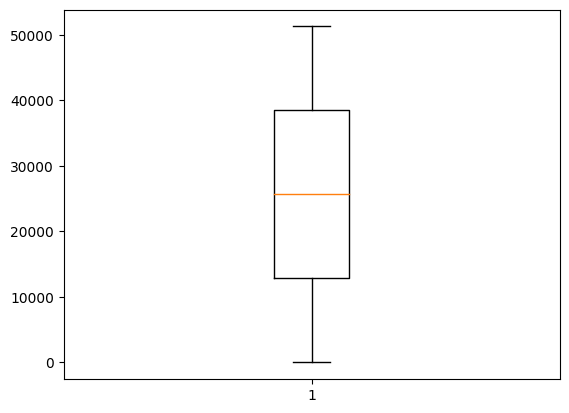

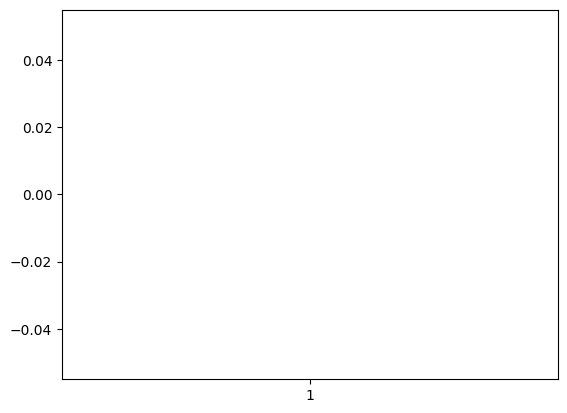

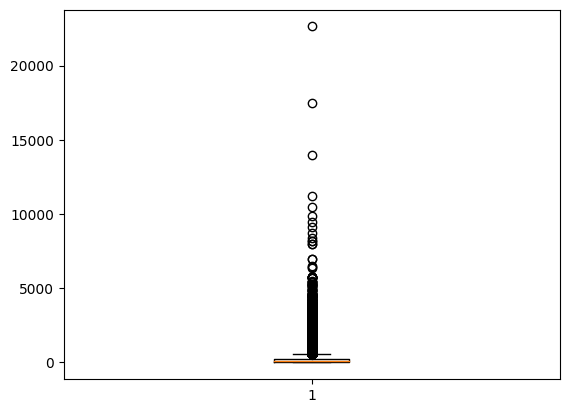

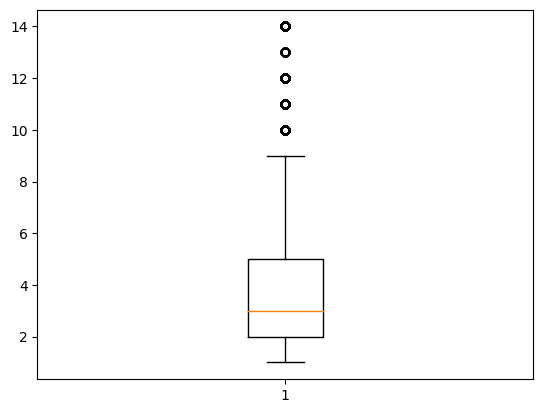

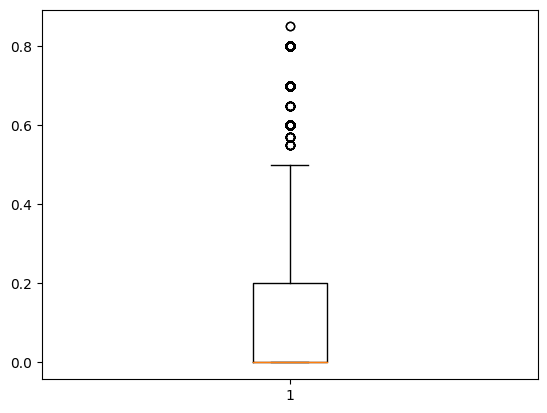

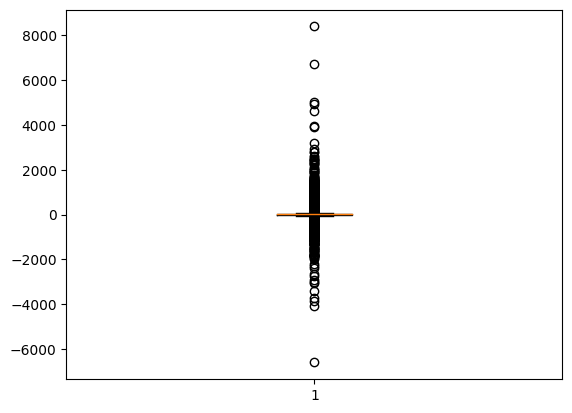

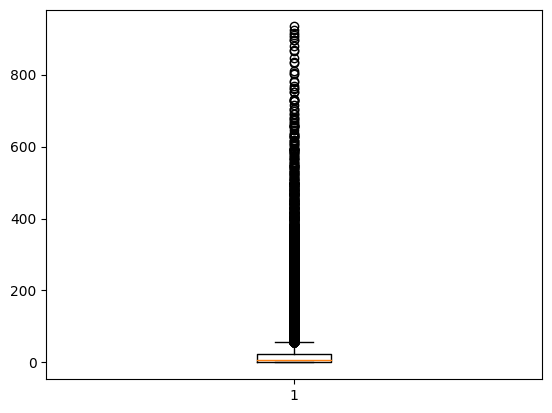

In [14]:
for i in df_num:
    plt.boxplot(x=i,data=df_num)
    plt.show()

In [15]:
df_cat

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,CA-2012-124891,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,Critical
1,IN-2013-77878,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,IN-2013-71249,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",Medium
3,ES-2013-1579342,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",Medium
4,SG-2013-4320,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2014-62366,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",Medium
51286,US-2014-102288,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,Medium
51287,US-2013-155768,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",High
51288,MX-2012-140767,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",Medium


In [16]:
df_cat.isnull().sum()

Order ID          0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Order Priority    0
dtype: int64

In [17]:
df_num.isnull().sum()

Row ID               0
Postal Code      41296
Sales                0
Quantity             0
Discount             0
Profit               0
Shipping Cost        0
dtype: int64

In [18]:
df_num.drop("Postal Code",axis=1,inplace=True)

In [19]:
df_m=pd.concat([df_num,df_cat],axis=1)

In [20]:
df_m

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order ID,Ship Mode,Customer ID,Customer Name,...,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,32298,2309.650,7,0.0,762.1845,933.570,CA-2012-124891,Same Day,RH-19495,Rick Hansen,...,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,Critical
1,26341,3709.395,9,0.1,-288.7650,923.630,IN-2013-77878,Second Class,JR-16210,Justin Ritter,...,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,25330,5175.171,9,0.1,919.9710,915.490,IN-2013-71249,First Class,CR-12730,Craig Reiter,...,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",Medium
3,13524,2892.510,5,0.1,-96.5400,910.160,ES-2013-1579342,First Class,KM-16375,Katherine Murray,...,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",Medium
4,47221,2832.960,8,0.0,311.5200,903.040,SG-2013-4320,Same Day,RH-9495,Rick Hansen,...,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,65.100,5,0.0,4.5000,0.010,IN-2014-62366,Same Day,KE-16420,Katrina Edelman,...,Kure,Hiroshima,Japan,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",Medium
51286,35398,0.444,1,0.8,-1.1100,0.010,US-2014-102288,Standard Class,ZC-21910,Zuschuss Carroll,...,Houston,Texas,United States,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,Medium
51287,40470,22.920,3,0.0,11.2308,0.010,US-2013-155768,Same Day,LB-16795,Laurel Beltran,...,Oxnard,California,United States,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",High
51288,9596,13.440,2,0.0,2.4000,0.003,MX-2012-140767,Standard Class,RB-19795,Ross Baird,...,Valinhos,São Paulo,Brazil,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",Medium


In [21]:
df_m.isnull().sum()

Row ID            0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order ID          0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Order Priority    0
dtype: int64

In [22]:
df_num_corr=df_num.corr()
df_num_corr

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,-0.043889,-0.173483,0.087594,-0.019037,-0.039076
Sales,-0.043889,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,-0.086722,-0.019875,1.000000,-0.316490,-0.079055
Profit,-0.019037,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039076,0.768073,0.272649,-0.079055,0.354441,1.000000


In [23]:
df_num_corr["Sales"]

Row ID          -0.043889
Sales            1.000000
Quantity         0.313577
Discount        -0.086722
Profit           0.484918
Shipping Cost    0.768073
Name: Sales, dtype: float64

In [24]:
df_num_cols = []
df_num_cols.extend(df_num_corr[(df_num_corr["Sales"]>0.3)].index.values)
df_num_cols.extend(df_num_corr[(df_num_corr["Sales"]<-0.3) ].index.values)

In [25]:
df_num_cols

['Sales', 'Quantity', 'Profit', 'Shipping Cost']

In [26]:
from scipy.stats import f_oneway

In [27]:
df_cat['SL']=df_num['Sales']

In [28]:
groups = [df_cat['SL'][df_cat['Region'] == category] for category in df_cat['Region'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 55.48438366881459, P-value: 7.28547664877952e-134


In [29]:
c_list=[]
nc_list=[]
for c1 in list(df_cat.columns):
    if c1 == 'SL':
        continue
    else:
        groups = [df_cat['SL'][df_cat[c1] == category] for category in df_cat[c1].unique()]
        f_stat, p_value = f_oneway(*groups)
        print(f"column : {c1}, F-statistic: {f_stat}, P-value: {p_value}")
        if p_value < 0.05:
            c_list.append(c1)
        else:
            nc_list.append(c1)

column : Order ID, F-statistic: 0.9549434499662576, P-value: 0.9998876246423096
column : Ship Mode, F-statistic: 0.1526560527691358, P-value: 0.9280231614232922
column : Customer ID, F-statistic: 1.0283253165181494, P-value: 0.21486707133261737
column : Customer Name, F-statistic: 1.0033270824511336, P-value: 0.4673086036731087
column : Segment, F-statistic: 0.13863205044443572, P-value: 0.8705486136081234
column : City, F-statistic: 1.3229187405568366, P-value: 2.26270178341672e-33
column : State, F-statistic: 1.9821497637740437, P-value: 8.661653687079241e-71
column : Country, F-statistic: 8.580418547520852, P-value: 1.494973572691078e-172
column : Market, F-statistic: 123.4930001276269, P-value: 1.2042700444383753e-155
column : Region, F-statistic: 55.48438366881459, P-value: 7.28547664877952e-134
column : Product ID, F-statistic: 10.259434332830676, P-value: 0.0
column : Category, F-statistic: 2990.276309715733, P-value: 0.0
column : Sub-Category, F-statistic: 861.6155179064883, P-

In [30]:
c_list

['City',
 'State',
 'Country',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name']

In [31]:
nc_list

['Order ID',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Order Priority']

In [32]:
df_cat1=df_cat[c_list]

In [33]:
df_cat1.columns

Index(['City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cat1=df_cat1.apply(le.fit_transform)

In [35]:
def remove_outliers(df,columns):
    for col in columns:
        q1=df[col].quantile(0.25) #first quartile 25th percentile
        q3=df[col].quantile(0.75) #third quartile 75th percentile
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
    return df

In [36]:
columns_to_check = ['Row ID','Sales','Quantity','Discount','Profit','Shipping Cost']    

df_no_outliers = remove_outliers(df_num, columns_to_check)

print("Original DataFrame:")
print(df_num.shape)
print("\nDataFrame after Outlier Treatment:")
print(df_no_outliers.shape)

Original DataFrame:
(51290, 6)

DataFrame after Outlier Treatment:
(30879, 6)


In [ ]:
for j in df_no_outliers.select_dtypes(include=[np.number]):
    plt.boxplot(x=j,data=df_no_outliers)
    plt.show()

In [37]:
df_f_cat=df_cat1.loc[df_no_outliers.index,:]

In [38]:
df_f_cat.shape

(30879, 9)

In [39]:
df_f_cat.columns

Index(['City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [41]:
columns_to_scale =['Row ID','Sales','Quantity','Discount','Profit','Shipping Cost'] 

In [42]:
standard_scaler = StandardScaler()
df_standard_scaled = df_no_outliers.copy()
df_standard_scaled[columns_to_scale] = standard_scaler.fit_transform(df_no_outliers[columns_to_scale])

In [43]:
df_standard_scaled.head()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
12068,0.554650,1.208948,-0.530879,0.734589,1.419094,3.275750
12069,0.759078,1.760251,0.718684,1.406908,-2.778887,3.275750
12073,-0.971982,2.699341,0.718684,-0.610050,-0.193081,3.272457
12074,0.351571,1.517718,0.718684,2.079228,-0.129688,3.272457
12078,0.426671,0.800576,1.968248,0.734589,1.880483,3.269164


In [44]:
df_standard_scaled.shape

(30879, 6)

In [45]:
final_df=pd.concat([df_standard_scaled,df_f_cat],axis=1)

In [46]:
final_df

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name
12068,0.554650,1.208948,-0.530879,0.734589,1.419094,3.275750,1400,982,139,6,3,8087,2,0,2290
12069,0.759078,1.760251,0.718684,1.406908,-2.778887,3.275750,3508,273,139,6,6,1982,0,16,2218
12073,-0.971982,2.699341,0.718684,-0.610050,-0.193081,3.272457,3431,129,119,4,10,2742,1,1,1908
12074,0.351571,1.517718,0.718684,2.079228,-0.129688,3.272457,2119,1033,6,0,9,10112,2,13,2485
12078,0.426671,0.800576,1.968248,0.734589,1.880483,3.269164,772,742,139,6,6,4445,1,7,3471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,-0.062149,-0.201181,1.343466,0.062269,0.497694,-1.072554,3265,820,6,0,9,3689,1,3,406
51285,0.263843,-0.103653,1.343466,-0.610050,-0.389461,-1.072554,1726,410,65,0,8,4810,1,8,239
51287,1.038336,-0.687161,0.093902,-0.610050,-0.002971,-1.072554,2408,192,139,6,12,4341,1,7,5
51288,-1.046743,-0.818305,-0.530879,-0.610050,-0.510045,-1.073706,3346,955,17,5,10,3490,1,3,87


In [47]:
final_df.shape

(30879, 15)

In [48]:
from scipy.stats import chi2_contingency
chi2_results = {}
for col in ['City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name']:
    contingency_table = pd.crosstab(df_cat[col], df_cat['Region'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = p

In [49]:
chi2_df = pd.DataFrame(list(chi2_results.items()), columns=['Feature', 'P-Value'])
chi2_df['Significant'] = chi2_df['P-Value'] < 0.05  # Mark significant relationships
print(chi2_df)

        Feature       P-Value  Significant
0          City  0.000000e+00         True
1         State  0.000000e+00         True
2       Country  0.000000e+00         True
3        Market  0.000000e+00         True
4        Region  0.000000e+00         True
5    Product ID  0.000000e+00         True
6      Category  4.278815e-58         True
7  Sub-Category  0.000000e+00         True
8  Product Name  0.000000e+00         True


In [50]:
x=final_df.drop("Sales",axis=1)
y=final_df["Sales"]

In [51]:
x

,Row ID,Quantity,Discount,Profit,Shipping Cost,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name
12068,0.554650,-0.530879,0.734589,1.419094,3.275750,1400,982,139,6,3,8087,2,0,2290
12069,0.759078,0.718684,1.406908,-2.778887,3.275750,3508,273,139,6,6,1982,0,16,2218
12073,-0.971982,0.718684,-0.610050,-0.193081,3.272457,3431,129,119,4,10,2742,1,1,1908
12074,0.351571,0.718684,2.079228,-0.129688,3.272457,2119,1033,6,0,9,10112,2,13,2485
12078,0.426671,1.968248,0.734589,1.880483,3.269164,772,742,139,6,6,4445,1,7,3471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,-0.062149,1.343466,0.062269,0.497694,-1.072554,3265,820,6,0,9,3689,1,3,406
51285,0.263843,1.343466,-0.610050,-0.389461,-1.072554,1726,410,65,0,8,4810,1,8,239
51287,1.038336,0.093902,-0.610050,-0.002971,-1.072554,2408,192,139,6,12,4341,1,7,5
51288,-1.046743,-0.530879,-0.610050,-0.510045,-1.073706,3346,955,17,5,10,3490,1,3,87


In [52]:
y

12068    1.208948
12069    1.760251
12073    2.699341
12074    1.517718
12078    0.800576
           ...   
51284   -0.201181
51285   -0.103653
51287   -0.687161
51288   -0.818305
51289   -0.155115
Name: Sales, Length: 30879, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
x_train

,Row ID,Quantity,Discount,Profit,Shipping Cost,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name
20812,-1.338428,-0.530879,-0.610050,0.091727,0.844092,1363,921,81,5,7,7666,1,15,145
13241,-0.497750,-0.530879,-0.610050,-0.320556,2.778519,2951,46,119,4,10,8872,2,6,758
13790,-1.562172,1.968248,-0.610050,0.399504,2.570571,1039,322,92,5,3,4670,1,7,821
18948,0.826208,1.343466,-0.610050,0.234820,1.183098,2290,703,139,6,6,7513,1,15,1476
32170,1.576591,-1.155661,-0.610050,-0.535884,-0.318474,1929,583,102,3,5,2329,1,7,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49535,0.453077,0.093902,-0.610050,-0.523344,-1.000109,210,352,139,6,10,3243,1,2,2471
20491,-0.318985,0.718684,0.062269,3.118503,0.898260,497,820,6,0,9,3708,1,3,1969
13604,-1.685221,-0.530879,-0.596604,3.127034,2.636100,3232,454,81,5,7,8972,2,6,741
33101,-0.418937,1.343466,2.751547,-1.332601,-0.377747,2967,311,138,4,7,2899,1,2,3270


In [55]:
x_test

,Row ID,Quantity,Discount,Profit,Shipping Cost,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name
19363,-0.349983,0.718684,0.062269,-1.365158,1.097482,1115,105,47,4,3,7092,1,14,2852
29631,1.373648,0.718684,-0.610050,0.316818,-0.142303,2590,802,31,3,5,4080,1,2,688
41424,-0.128468,-0.530879,2.751547,-1.238717,-0.754787,2809,755,65,0,8,3255,1,2,653
44537,1.206634,-1.155661,-0.610050,-0.155183,-0.856867,867,271,128,1,0,2335,1,7,276
24671,-0.592975,1.343466,-0.610050,0.807767,0.312120,1774,581,47,4,3,6267,1,12,1619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24966,-1.588510,0.093902,-0.610050,-0.430804,0.282155,2138,375,50,5,3,4710,1,7,828
33246,-0.625122,-1.155661,-0.610050,0.344380,-0.385979,3075,311,138,4,7,7998,2,0,1305
41845,0.324017,0.093902,2.549851,-1.460248,-0.769605,274,457,58,0,11,4919,1,8,3339
23224,-0.088150,1.343466,0.532893,-0.550010,0.491584,1384,411,143,0,11,5724,1,10,1876


In [56]:
y_train

20812   -0.507875
13241    2.939218
13790    1.816195
18948   -0.244758
32170   -0.662675
           ...   
49535   -0.888857
20491    1.631265
13604    3.824033
33101   -0.546679
42125   -0.824945
Name: Sales, Length: 24703, dtype: float64

In [57]:
y_test

19363    2.089937
29631    0.054881
41424   -0.359716
44537   -0.745678
24671    1.340590
           ...   
24966   -0.257208
33246   -0.460149
41845   -0.700690
23224   -0.329088
23120    0.232507
Name: Sales, Length: 6176, dtype: float64

In [58]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [59]:
lin_reg.score(x_train,y_train)

0.5686553813834987

In [60]:
lin_reg.score(x_test,y_test)

0.5545898423805432

In [61]:
y_pred=lin_reg.predict(x_test)
y_pred

array([ 0.50915469, -0.06009036, -0.56081389, ..., -0.55014011,
        0.36156373,  0.45928374])

In [62]:
from sklearn.metrics import r2_score,mean_squared_error
r_score=r2_score(y_pred,y_test)
r_score

0.23805379437019902

In [63]:
mse=mean_squared_error(y_pred,y_test)
mse

0.4234408368235813

In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
alpha_values = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge model
ridge = Ridge()

# Perform Grid Search
ridge_cv = GridSearchCV(ridge, alpha_values, scoring='r2', cv=5)
ridge_cv.fit(x_train, y_train)

# Best alpha value
print("Best alpha for Ridge:", ridge_cv.best_params_)


Best alpha for Ridge: {'alpha': 100}


In [65]:
ridge_cv.score(x_train,y_train)

0.5686484234559459

In [66]:
ridge_cv.score(x_test,y_test)

0.5547002164965545

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# Define hyperparameter grid
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, alpha_values, scoring='r2', cv=5)
lasso_cv.fit(x_train, y_train)

print("Best alpha for Lasso:", lasso_cv.best_params_)


Best alpha for Lasso: {'alpha': 0.001}


In [68]:
lasso_cv.score(x_train,y_train)

0.568647943162878

In [69]:
lasso_cv.score(x_test,y_test)

0.5546593572412366

In [70]:
from sklearn.tree import DecisionTreeRegressor
clf_reg = DecisionTreeRegressor(random_state=42)

# Fit the model
clf_reg.fit(x_train, y_train)

# Make predictions
y_pred = clf_reg.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

In [71]:
clf_reg.score(x_train,y_train)

1.0

In [72]:
clf_reg.score(x_test,y_test)

0.37078181414197664

In [73]:
from sklearn.metrics import r2_score
acc=r2_score(y_pred,y_test)
acc

0.4135834858118891

In [74]:
y_pred

array([ 0.16000415,  0.28064829, -0.59199854, ..., -0.70398966,
       -0.46678926, -0.23064714])

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}


In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(x_train, y_train)

# Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 864 candidates, totalling 4320 fits


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_reg.fit(x_train, y_train)

# Make predictions
y_pred = rf_reg.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

In [ ]:
rf_reg.score(x_train,y_train)

In [ ]:
rf_reg.score(x_test,y_test)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
weak_learner = DecisionTreeRegressor(max_depth=1)
clf = AdaBoostRegressor(base_estimator=weak_learner, n_estimators=50, random_state=42)

# Train the model
clf.fit(x_train, y_train)

# Predict
y_pred = clf.predict(x_test)

In [ ]:
clf.score(x_train,y_train)

In [ ]:
clf.score(x_test,y_test)

In [ ]:
y_pred=lin_reg.predict(x_test)
y_pred

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(lin_reg, x_train, y_train, cv=5, scoring="r2").mean()

In [ ]:
cross_val

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',
    'max_depth': 4,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train XGBoost model
xgb_r = xg.XGBRegressor(n_estimators = 10)
xgb_model=xgb_r.fit(x_train,y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
xgb_r.score(x_train,y_train)

In [ ]:
xgb_r.score(x_test,y_test)